# Investigation Overview
*****In this investigation, I wanted to look at the characteristics of people that take loans from the bank*****

## Dataset Overview
#### The data we work to display contains: 113937 row and 81 columns Most of the columns are in digital form, but there are text columns as well. The rows are loans, and the columns are the variables they describe them, such as the number and amount of loans, loan status, interest rate, and borrower status. and a lot of additional variables, ProsperLoanData.pdf file describes all the variables . We will not be able to explore all the variables, but we have worked on a few of them.​

In [20]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams
%matplotlib inline

In [16]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('C:/Users/Dubai-Key/Downloads/projects/Data visualization/prosperloanData.csv')
print(df.shape)
df.head()

(113937, 81)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


## Distribution of Total Trades for each Loan
#### Number of trade lines ever opened at the time the credit profile was pulled ranges between 10 and 30 and the highest value is at 20​ 

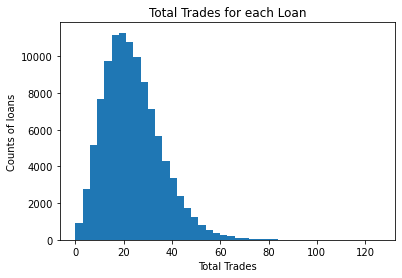

In [18]:
plt.title('Total Trades for each Loan')
plt.xlabel("Total Trades")
plt.ylabel("Counts of loans")
bins = np.arange(0, df.TotalTrades.max()+3,3)
plt.hist(df.TotalTrades, bins = bins);
rcParams['figure.figsize'] =( 10,10);

## Distribution of Loan Original Amount
***The origination amount of the loan is mostly in the numbers 5, 10, 15 and 20 thousand with large numbers from 0 to 10 thousand.***

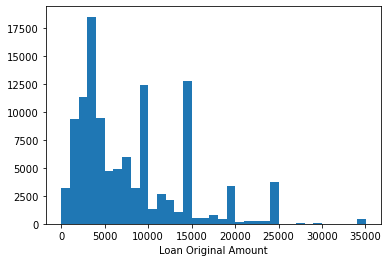

In [23]:
plt.xlabel("Loan Original Amount")
bins = np.arange(20, df.LoanOriginalAmount.max()+1000,1000)
plt.hist(df.LoanOriginalAmount, bins = bins);

## Employment Status of all Borrower​
***Employment Status of all Loans are mostly current or completed and there are a few chargedoff and defaulted.***

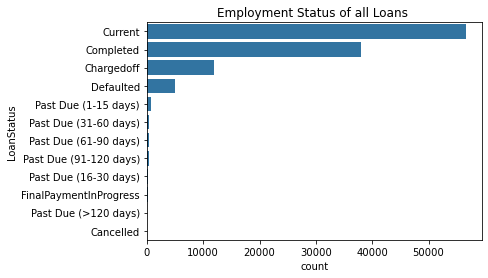

In [24]:
base_color = sb.color_palette()[0]
order = df['LoanStatus'].value_counts().index
sb.countplot(data=df, y='LoanStatus',color=base_color,order=order);
plt.title('Employment Status of all Loans ');


### ProsperScore: is considered the most risky score is 4 then 6, 8and 7 and score 1 is the least dangerous 

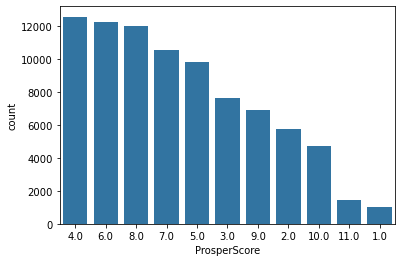

In [25]:
counts = df['ProsperScore'].value_counts()
loan_order = counts.index
base_color = sb.color_palette()[0]
sb.countplot(data=df, x='ProsperScore', color=base_color,order=loan_order);

### Borrowers are in the 1 grade, which is the least dangerous, and a few are in the 2 and 3, and it is also among the least dangerous grades.

C:\Users\Dubai-Key\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


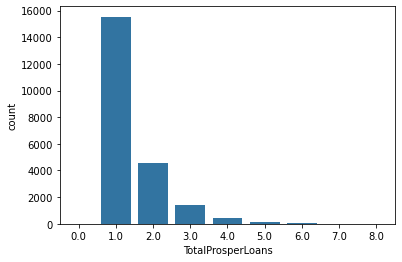

In [26]:
from pylab import rcParams
base_color = sb.color_palette()[0]
sb.countplot(df['TotalProsperLoans'],color=base_color);
rcParams['figure.figsize'] =( 10,10);

**From the relationship between Borrower Rate and Prosper rating,
it is clear that the Borrower Rate increases as the Prosper rating
decreases.**


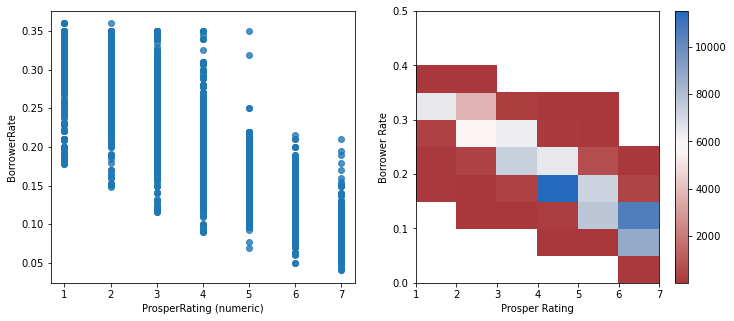

In [27]:
#Relationship between Borrower Rate and Prosper rating
plt.figure(figsize = [12,5])

plt.subplot(1,2,1)
sb.regplot(data = df, x = 'ProsperRating (numeric)', y = 'BorrowerRate', fit_reg = False)


plt.subplot(1,2,2)
bins_x = np.arange(1, 7+1, 1)
bins_y= np.arange(0, .5+0.05, 0.05)
plt.hist2d(data = df, x = 'ProsperRating (numeric)', y = 'BorrowerRate', 
           bins = [bins_x, bins_y], cmap = 'vlag_r', cmin = 0.5)
plt.colorbar()
plt.xlabel('Prosper Rating')
plt.ylabel('Borrower Rate');